In [ ]:
import pandas as pd

In [ ]:
df_pull_requests = pd.read_csv('pull_request_statistics.csv.gz', compression='gzip')

In [ ]:
df_account_level = pd.read_csv('account_level_modified.csv.gz', compression='gzip')

In [ ]:
df_pull_requests['pull_created'] = pd.to_datetime(df_pull_requests['pull_created'])

df_pull_requests.set_index('pull_created', inplace=True)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
df_pull_requests['company_name'] = df_pull_requests['repo_name'].apply(lambda x: x.split('/')[0])

group_definitions = {
    'Group 1: Major Tech': ['google', 'amazon', 'facebook', 'apple', 'microsoft'],
    'Group 2: Tech Giants': ['ibm', 'tencent', 'intel', 'samsung', 'alibaba'],
    'Group 3: Innovators': ['openai', 'nvidia', 'huawei', 'salesforce', 'baidu'],
    'Group 4: Other Companies': []
}

company_to_group = {}
for group, companies in group_definitions.items():
    for company in companies:
        company_to_group[company] = group

all_companies = set(df_pull_requests['company_name'])
listed_companies = set(company_to_group.keys())
unlisted_companies = all_companies - listed_companies
for company in unlisted_companies:
    company_to_group[company] = 'Group 4: Other Companies'

df_pull_requests['Group'] = df_pull_requests['company_name'].map(lambda x: company_to_group.get(x.lower(), 'Group 4: Other Companies'))

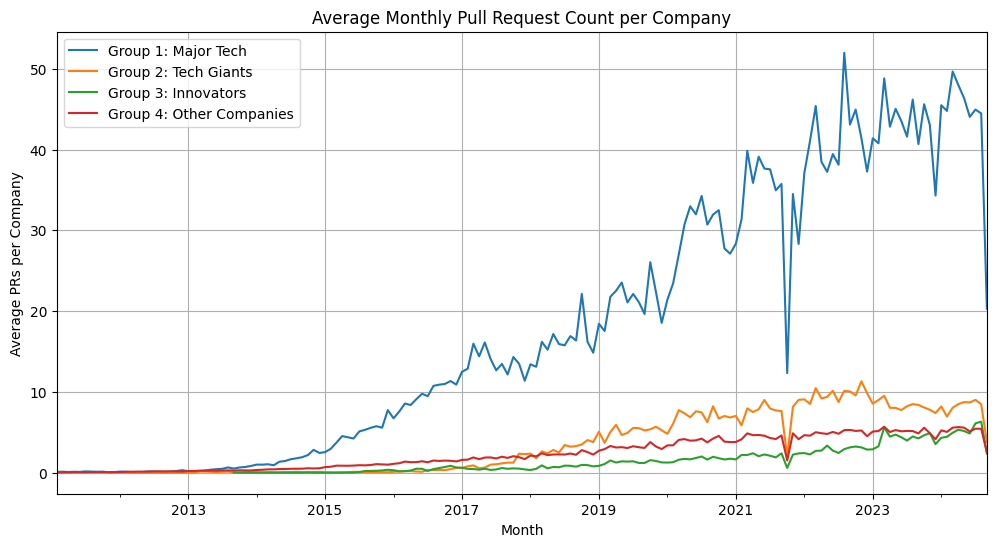

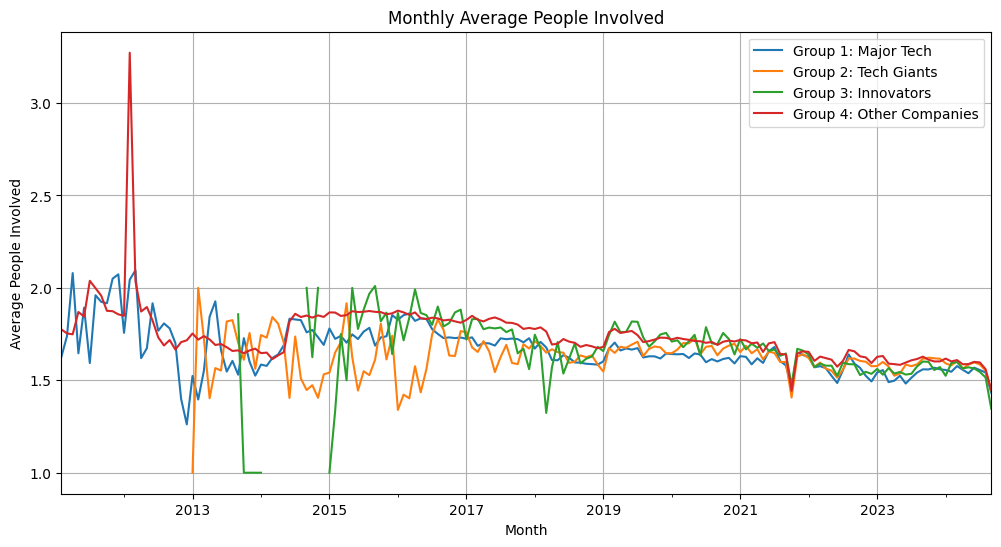

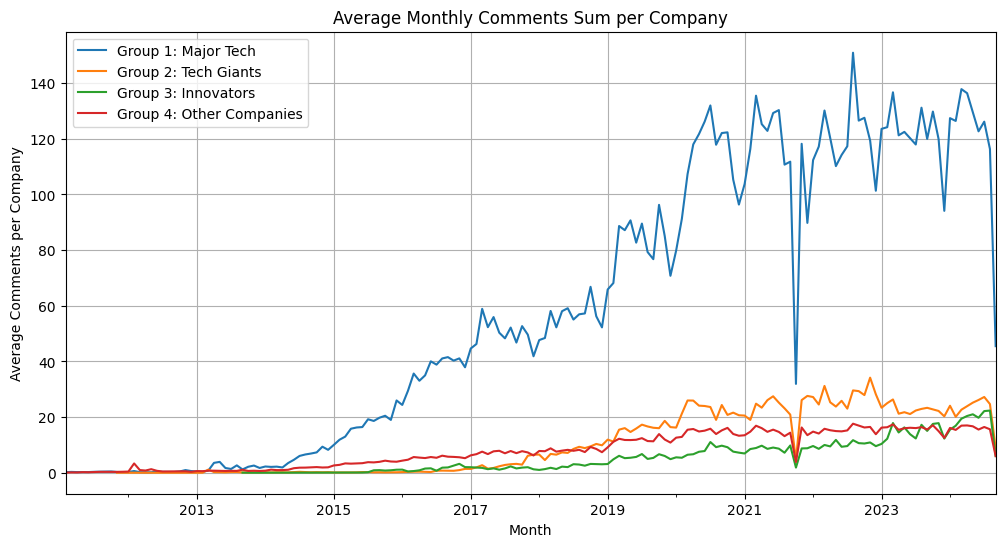

In [ ]:
monthly_company_count = df_pull_requests.groupby(['Group', 'company_name']).resample('M').size().groupby('Group').count()

monthly_pr_count = df_pull_requests.groupby('Group').resample('M').size()

monthly_avg_people_involved = df_pull_requests.groupby('Group')['involved_people'].resample('M').mean()

monthly_comments_sum = df_pull_requests.groupby('Group')['number_of_comments'].resample('M').sum()

monthly_avg_pr_count = monthly_pr_count.div(monthly_company_count, level='Group')
monthly_avg_comments_sum = monthly_comments_sum.div(monthly_company_count, level='Group')

plt.figure(figsize=(12, 6))
for group in monthly_avg_pr_count.index.get_level_values(0).unique():
    monthly_avg_pr_count[group].plot(label=group)
plt.title('Average Monthly Pull Request Count per Company')
plt.xlabel('Month')
plt.ylabel('Average PRs per Company')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for group in monthly_avg_people_involved.index.get_level_values(0).unique():
    monthly_avg_people_involved[group].plot(label=group)
plt.title('Monthly Average People Involved')
plt.xlabel('Month')
plt.ylabel('Average People Involved')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for group in monthly_avg_comments_sum.index.get_level_values(0).unique():
    monthly_avg_comments_sum[group].plot(label=group)
plt.title('Average Monthly Comments Sum per Company')
plt.xlabel('Month')
plt.ylabel('Average Comments per Company')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_account_level['calendar_month'] = pd.to_datetime(df_account_level['calendar_month'], format='%Y%m')

df_account_level.set_index('calendar_month', inplace=True)

In [ ]:
df_account_level['company_name'] = df_account_level['account_name'].apply(lambda x: x.split('/')[0])

group_definitions = {
    'Group 1: Major Tech': ['google', 'amazon', 'facebook', 'apple', 'microsoft'],
    'Group 2: Tech Giants': ['ibm', 'tencent', 'intel', 'samsung', 'alibaba'],
    'Group 3: Innovators': ['openai', 'nvidia', 'huawei', 'salesforce', 'baidu'],
    'Group 4: Other Companies': []
}

company_to_group = {}
for group, companies in group_definitions.items():
    for company in companies:
        company_to_group[company] = group

all_companies = set(df_account_level['company_name'])
listed_companies = set(company_to_group.keys())
unlisted_companies = all_companies - listed_companies
for company in unlisted_companies:
    company_to_group[company] = 'Group 4: Other Companies'

df_account_level['Group'] = df_account_level['company_name'].map(company_to_group)

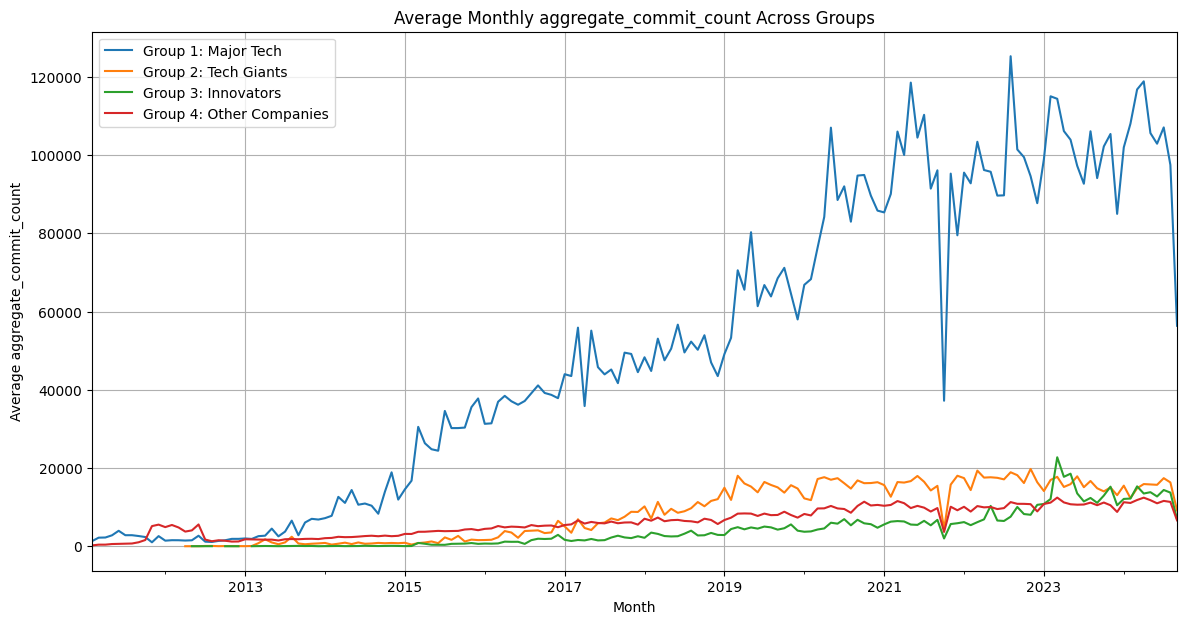

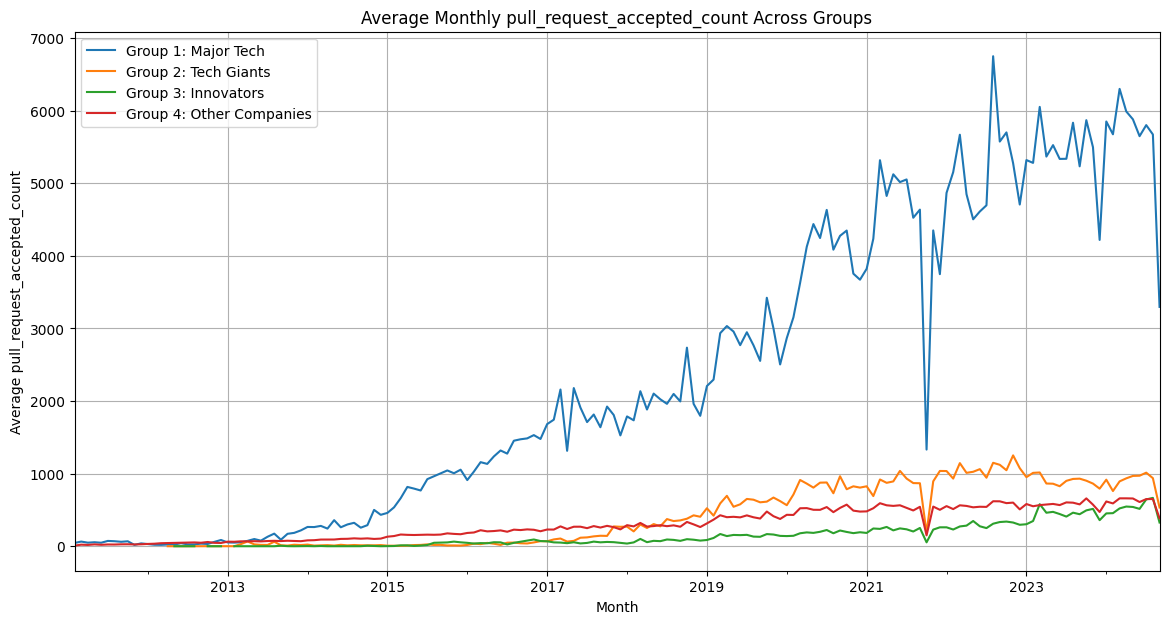

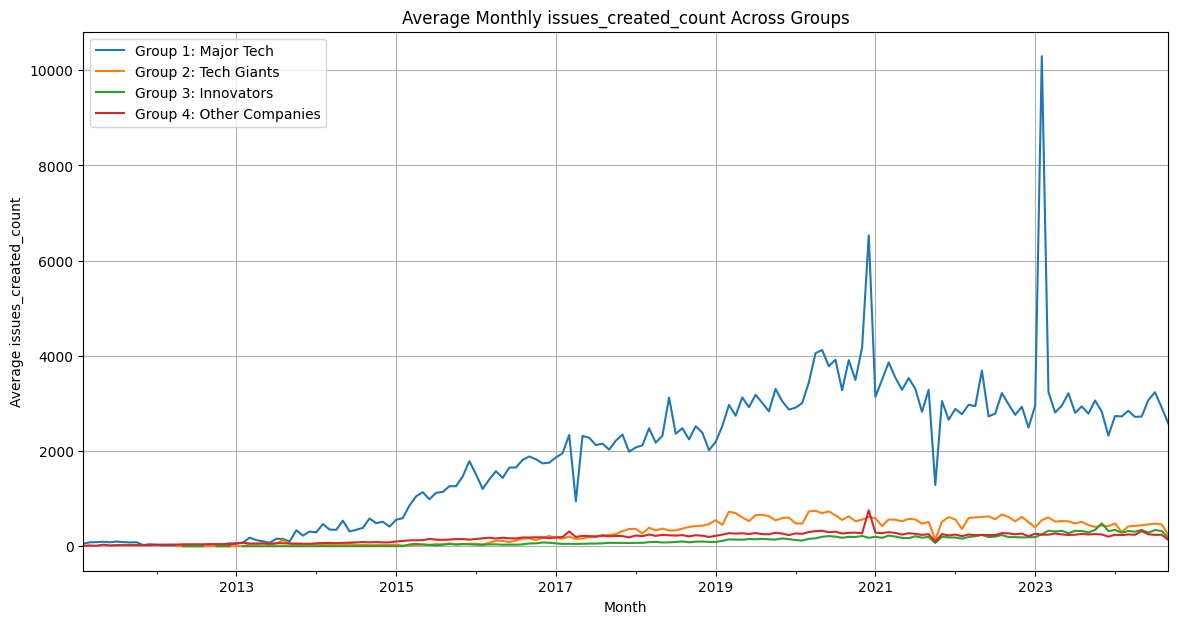

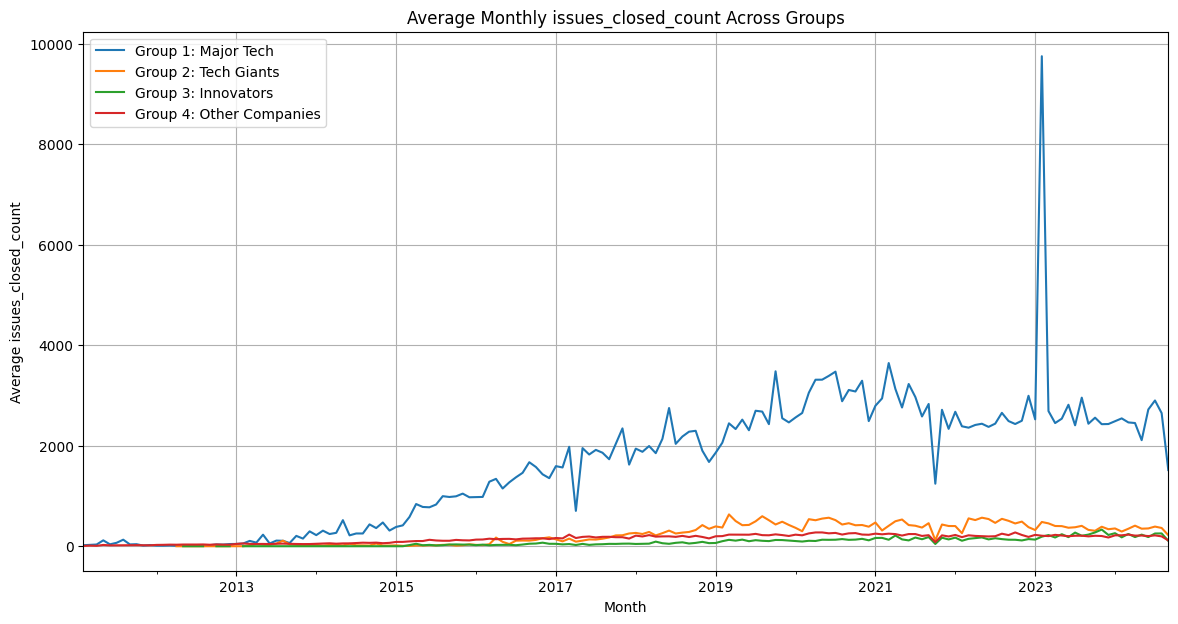

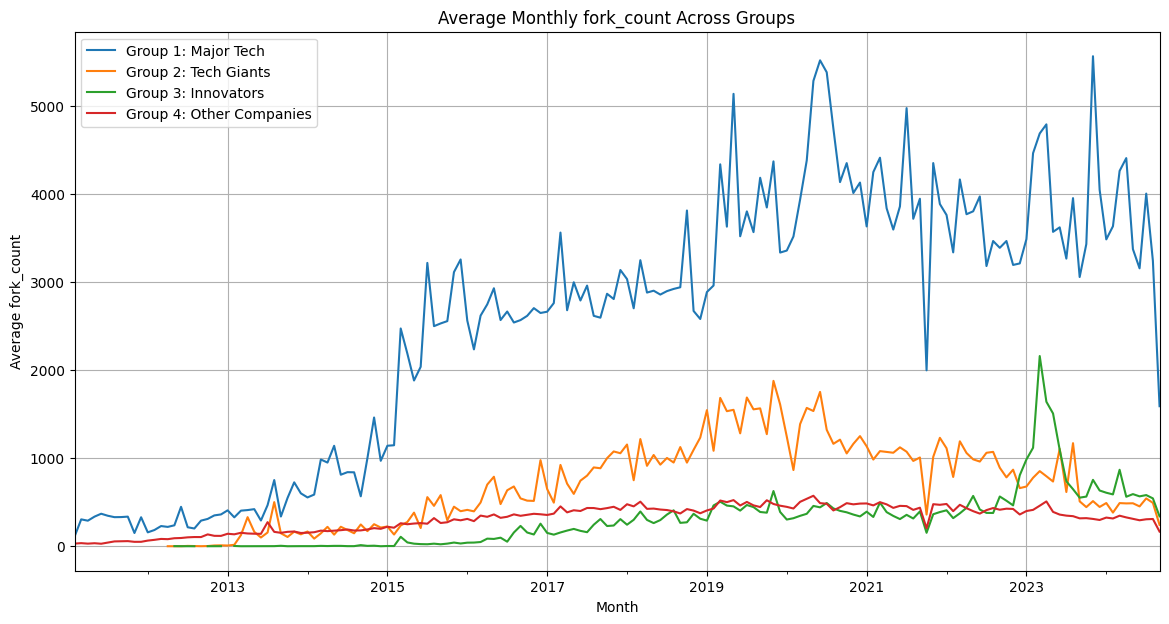

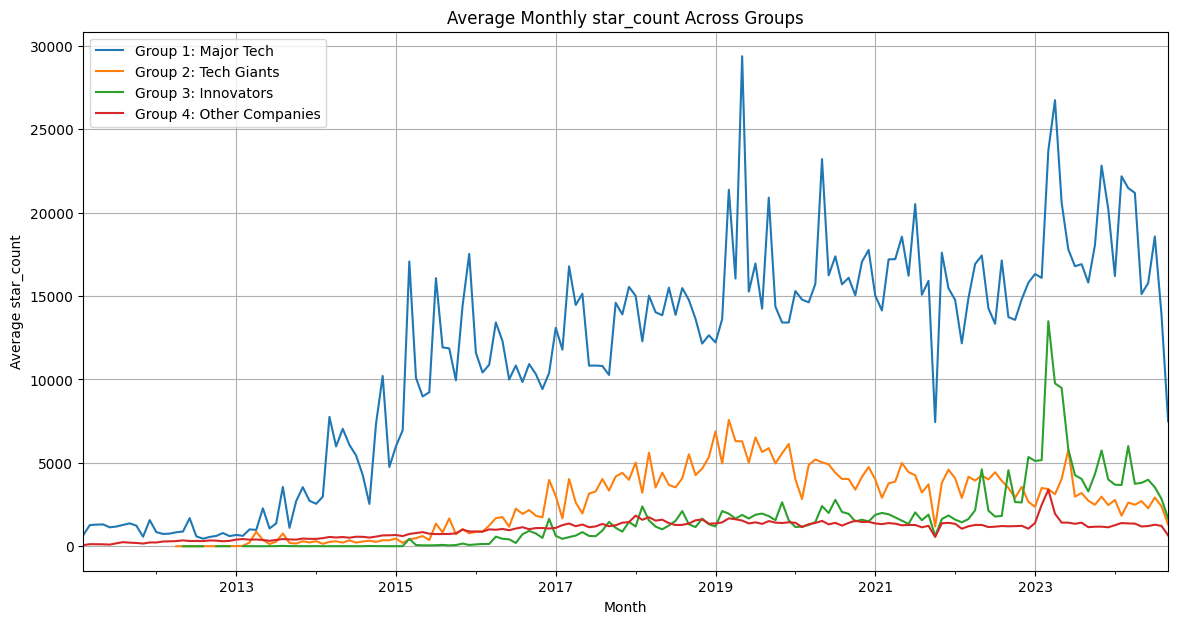

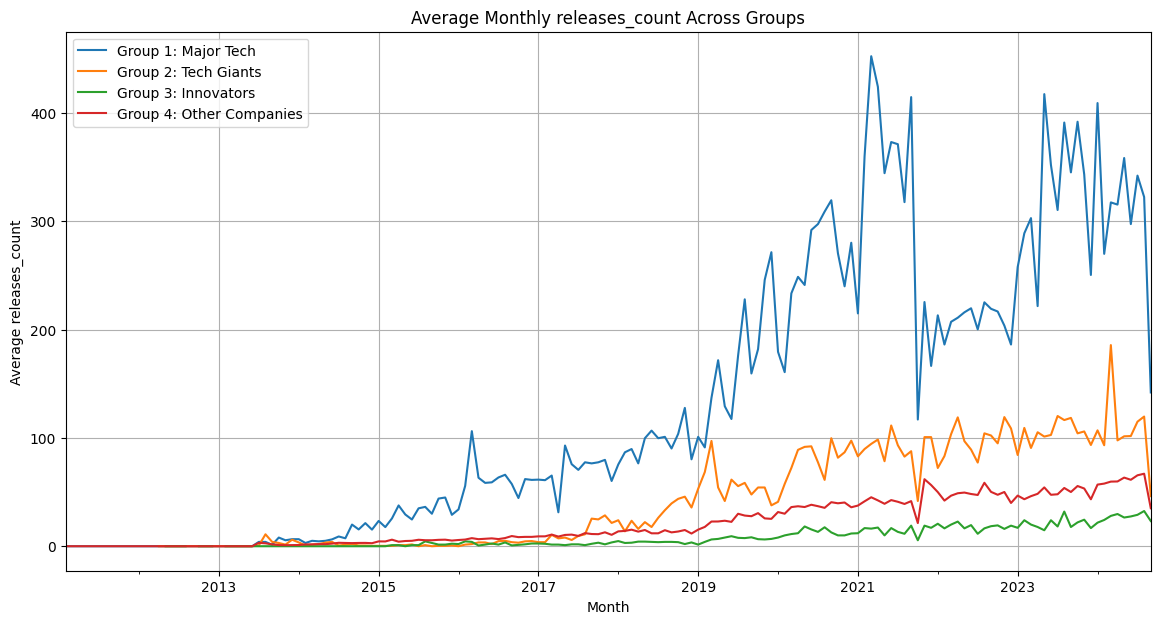

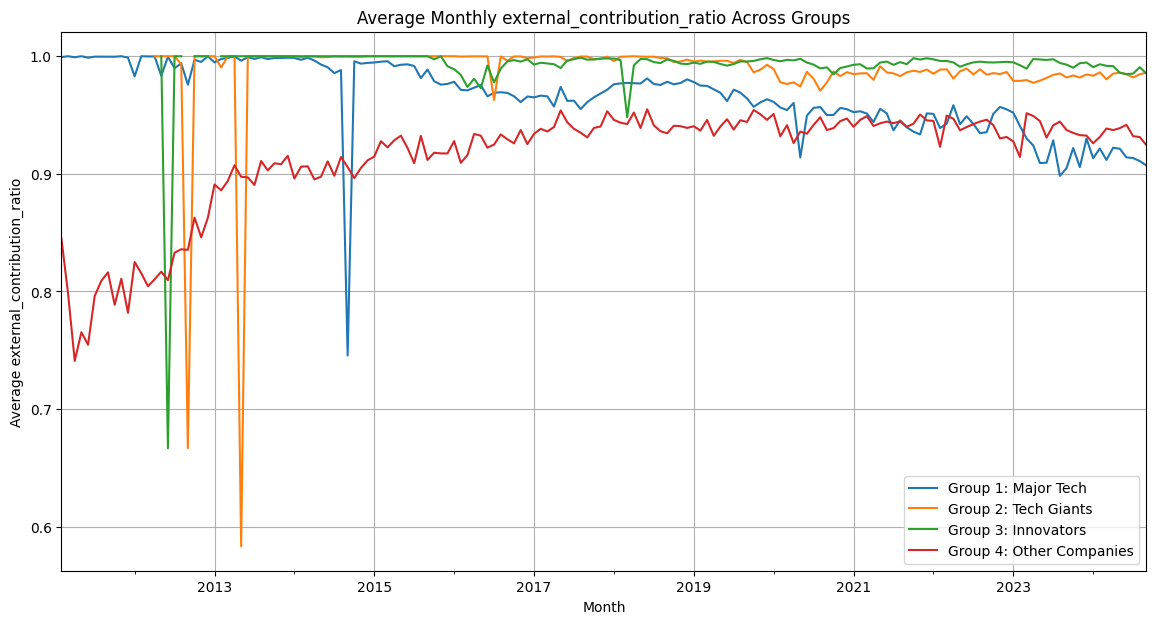

In [ ]:
df_account_level['Group'] = df_account_level['account_name'].map(lambda x: company_to_group.get(x.lower(), 'Group 4: Other Companies'))

metrics = [
    'aggregate_commit_count', 'pull_request_accepted_count',
    'issues_created_count', 'issues_closed_count',
    'fork_count', 'star_count', 'releases_count',
    'external_contribution_ratio'
]

for metric in metrics:
    plt.figure(figsize=(14, 7))
    for group, group_data in df_account_level.groupby('Group'):
        monthly_avg = group_data.resample('M')[metric].mean()
        monthly_avg.plot(label=group)
    plt.title(f'Average Monthly {metric} Across Groups')
    plt.xlabel('Month')
    plt.ylabel(f'Average {metric}')
    plt.legend()
    plt.grid(True)
    plt.show()